In [2]:
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import vega
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

from IPython.display import HTML, Image # For GIF
from matplotlib import rc
rc('animation', html='jshtml')

## Implementing Newton-Raphson Method in Python

In [3]:
def implied_vol(S0, K, T, r, market_price, flag='c', tol=0.00001):
    """Compute the implied volatility of a European Option
        S0: initial stock price
        K:  strike price
        T:  maturity
        r:  risk-free rate
        market_price: market observed price
        tol: user choosen tolerance
    """
    max_iter = 200 #max number of iterations
    vol_old = 0.30 #initial guess

    for k in range(max_iter):
        bs_price = bs(flag, S0, K, T, r, vol_old)
        Cprime =  vega(flag, S0, K, T, r, vol_old)*100
        C = bs_price - market_price
        vol_new = vol_old - C/Cprime
        bs_new = bs(flag, S0, K, T, r, vol_new)

        if (abs(vol_old - vol_new) < tol or abs(bs_new - market_price) < tol):
            break
        vol_old = vol_new

    implied_vol = vol_old
    return implied_vol

## Calculating an example option's IV


In [4]:
S0, K, T, r = 30, 28, 0.2, 0.025
market_price = 3.97
implied_vol_est = implied_vol(S0, K, T, r, market_price, flag='c')
print("Implied Volatility is : ", round(implied_vol_est,2)*100, "%")

Implied Volatility is :  54.0 %


## Plotting the calculation of IV as Newton-Raphson Method progresses

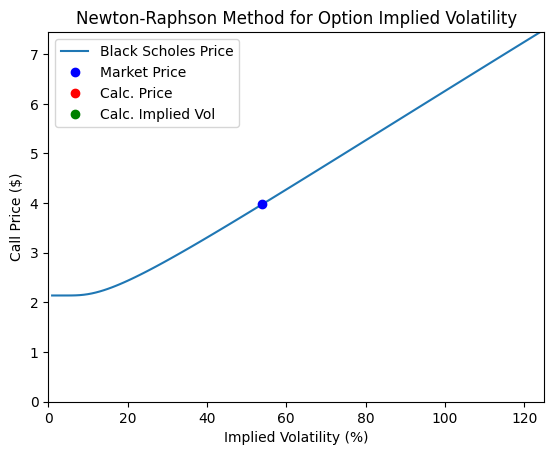

In [7]:
def implied_vol(S0, K, T, r, market_price, flag='c', tol=0.000001):
    """Compute the implied volatility of a European Option
        S0: initial stock price
        K:  strike price
        T:  maturity
        r:  risk-free rate
        market_price: market observed price
        tol: user choosen tolerance
    """
    max_iter = 200 #max number of iterations
    vol_old = 0.11 #initial guess

    x_vals = []
    y_vals = []

    for k in range(max_iter):
        bs_price = bs(flag, S0, K, T, r, vol_old)
        Cprime =  vega(flag, S0, K, T, r, vol_old)*100
        C = bs_price - market_price
        vol_new = vol_old - C/Cprime

        #append 1 - move up
        x_vals.append([vol_old*100,vol_old*100])
        y_vals.append([0,bs_price])

        bs_new = bs(flag, S0, K, T, r, vol_new)

        #append 2 - take step
        x_vals.append([vol_old*100,vol_new*100])
        y_vals.append([bs_price,0])

        if (abs(vol_old - vol_new) < tol):
            break

        vol_old = vol_new



    implied_vol = vol_old
    return implied_vol, x_vals, y_vals

S0, K, T, r, sigma = 30, 28, 0.2, 0.025, 0.3
prices, vols = [], []
for sigma in range(1,125):
    # print(bs('c', S0, K, T, r, sigma/100))
    # print(sigma)
    prices.append( bs('c', S0, K, T, r, sigma/100) )
    vols.append( sigma )

# print(prices)

market_price = 3.9790765403377035
implied_vol, x_vals, y_vals = implied_vol(S0, K, T, r, market_price, flag='c')

fig, ax = plt.subplots()
plt.title('Newton-Raphson Method for Option Implied Volatility')
plt.ylabel('Call Price ($)')
plt.xlabel('Implied Volatility (%)')
xdata, ydata = [], []
y1, = ax.plot(vols, prices, label = 'Black Scholes Price')
y3, = ax.plot([54], [market_price], 'bo', label = 'Market Price')
y2, = ax.plot([], [], 'r--')
y4, = ax.plot([], [], 'ro', label = 'Calc. Price')

y5, = ax.plot([], [], 'go', label = 'Calc. Implied Vol')
y6, = ax.plot([], [], 'g--')

# print(x_vals)
# print(y_vals)

def init():
    ax.set_xlim(0, 125)
    ax.set_ylim(0, max(prices))
    return y2, y4

def update(frame):
    xdata.append(x_vals[frame])
    ydata.append(y_vals[frame])
    if (frame % 2) == 0:
        y2.set_data(x_vals[frame], y_vals[frame])
        y4.set_data(x_vals[frame][1], y_vals[frame][1])
        return y2, y4
    else:
        y6.set_data(x_vals[frame], y_vals[frame])
        y5.set_data(x_vals[frame][1], y_vals[frame][1])
        return y2, y4

anim = animation.FuncAnimation(fig, update, frames=len(x_vals),
                    init_func=init, interval=750, repeat=True, blit=False)
ax.legend(loc='upper left')
# plt.show()

